$$
Título:
$$
$$
Análise \,de \,sismos \,por \,meio \,de \,equações \,diferenciais \,e \,da \,Lei \,de \,Hooke\\
$$
$$
Estudantes:
$$
$$
Analía \,Eizmendi \,Camêlo \,(aec)
$$
$$
Gledson \,Daniel \,Borges \,Campelo \,(gdbc)
$$
$$
João \,Victor \,Grangeiro \,Costa \,(jvgc)
$$
$$
Luan \,Flávio \,Cardoso \,Silva \,(lfcs3)
$$


# **(i) Resumo**

Este trabalho analisa o comportamento dinâmico de edifícios de múltiplos andares sob eventos sísmicos. A estrutura é modelada como um sistema simplificado de massas e molas, representado por equações diferenciais ordinárias de segunda ordem. O estudo aplica os princípios da Lei de Hooke e da Segunda Lei de Newton, em conjunto com teoria de autovalores, para determinar as frequências naturais e os modos de vibração da estrutura. As simulações computacionais, implementadas em Python, possibilitam a análise das oscilações dos andares e a avaliação de riscos associados à ressonância e ao colapso estrutural, fornecendo bases para o desenvolvimento de projetos estruturais mais seguros e resilientes.

# **(ii) Introdução e objetivos**

Nesse projeto, buscamos desenvolver um modelo simplificado de um prédio de dois andares sendo sacudido por um terremoto, que será representado inicialmente por um sistema mecânico de massas e molas. Com o modelo, pretendemos simular os deslocamentos dos andares ao longo do tempo por meio de equações diferenciais ordinárias (EDOs) acopladas de 2a ordem. Queremos avaliar, por meio desses deslocamentos, situações de ressonância ou amplificação perigosa, com implicações práticas no projeto de edifícios seguros.

A construção civil em regiões suscetíveis a terremotos exige atenção especial ao comportamento dinâmico das estruturas. Quando um sismo ocorre, o solo transmite vibrações para a base de edifícios, provocando oscilações nos andares que podem ser amplificadas, levando a rachaduras estruturais, colapsos parciais ou totais. Para diminuir esses riscos, é essencial compreender como os andares de uma edificação respondem às forças vibracionais.

A representação inicial que propomos ao prédio, considerando inicialmente dois andares, são duas massas ($m_1$ e $m_2$) ligadas entre si e às paredes por molas com constantes de rigidez $k_1$, $k_2$ e $k_3$. Cada massa representa um andar do prédio e as molas simulam a rigidez das estruturas verticais (colunas, vigas...). Assim, o sistema vibra como resposta a uma força externa, como os sismos.

Esse modelo pode ser uma ferramenta para investigar o impacto de diferentes configurações estruturais (valores de massa e rigidez) na resposta do edíficio. Ou seja, sua importância será contribuir para o planejamento de construções mais seguras e resistentes a terremotos.

O principal objetivo deste projeto é usar equações diferenciais acopladas para simular e analisar os deslocamentos dos andares de um edifício, a fim de compreender como diferentes escolhas estruturais (como a rigidez das colunas) influenciam a resposta da construção a vibrações externas, como as causadas por terremotos.

A simulação será realizada em Python. Ao final, esperamos:

- Avaliar a influência dos parâmetros estruturais nos deslocamentos e acoplamento entre os andares;
- Observar padrões de ressonância e amplificação de vibrações;
- Discutir estratégias para aumentar a estabilidade e segurança de edifícios frente a terremotos.




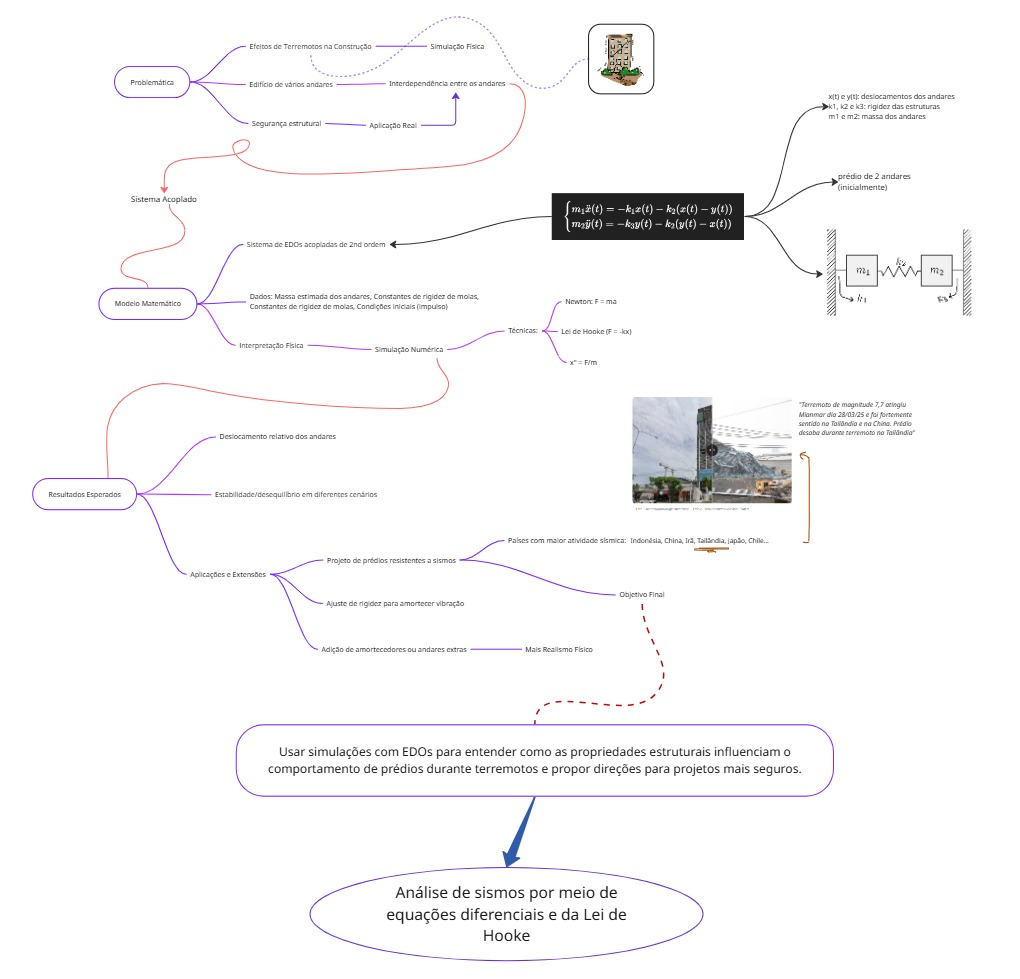

Para melhor visualização e aproximação do mapa mental, acesse [esse link](https://miro.com/app/board/uXjVIhTYGJ8=/?share_link_id=511886933897)

# **(iii) Modelo**

In [ ]:
#Bibliotecas usadas
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

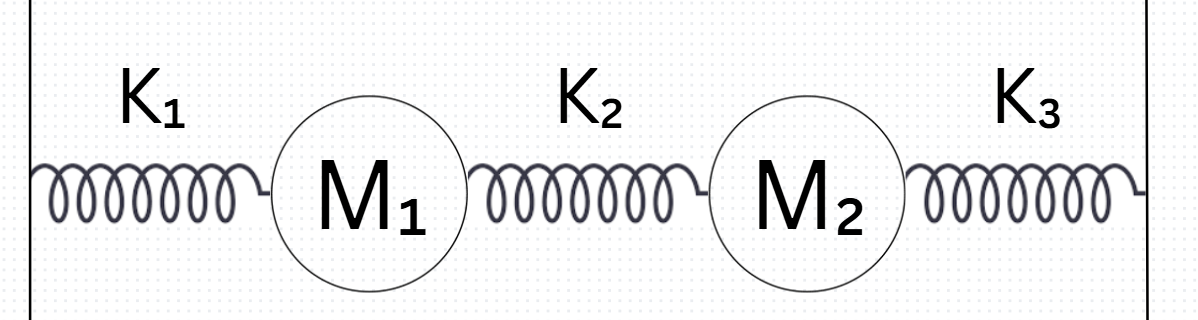

Primeiro, antes de analisarmos como um prédio é afetado por um terremoto, vamos analisar primeiro um sistema mais simples e compacto que é parecido com o problema atual: um sistema massa-mola com 2 massas.

Nesse cenário, quando uma mola se distorce, há uma força restauradora gerada para voltar ao equilíbrio, chamada de Lei de Hooke ($F = -kx$). Cada massa será afetada por 2 forças restauradoras geradas pelas duas molas conectadas a ela. A mola entre as 2 massas estará presente nas equações de ambas.

Seja $x$ o deslocamento da massa $m_1$ e $y$ o deslocamento da massa $m_2$. Na massa $m_1$, há a força restauradora gerada pela mola $k_1$ que depende apenas do deslocamento da massa $m_1$, e a força restauradora gerada pela mola $k_2$ depende da diferença de deslocamento entre as duas massas $(x-y)$, então a força atuando na massa $m_1$ é: $F1 = -k_1 x -k_2(x-y)$.

Na massa $m_2$, há a força restauradora gerada pela mola $k_3$ que depende apenas do deslocamento da massa $m_2$, e a força restauradora gerada pela mola $k_2$ depende da diferença entre as duas massas $(y-x)$, então a força atuando na massa $m_2$ é: $F2 = -k_3y - k_2(y-x)$.

Também devemos lembrar da 2° Lei de Newton, em que $F = ma$, ou seja, a força resultante em um objeto é igual a massa vezes aceleração. Como a aceleração é a segunda derivada do deslocamento, temos $F = mx'' \implies x'' = F/m$. Substituindo $F$ pelas forças restauradoras atuando no sistema, obtemos o sistema abaixo:
$$
\begin{cases}
  x'' = (-k_1x - k_2(x-y))/m_1 \\
  y'' = (-k_3y - k_2(y-x))/m_2
\end{cases}
$$

Essa sistema representa as forças atuando nas massas $m_1$ e $m_2$ onde se há a presença da Lei de Hooke ($F = -kx$) nas 3 molas, sendo $k_1$ a constante elástica da mola entre a parede 1 e a massa $m_1$, $k_2$ a constante da mola entre as duas massas e $k_3$ a constante da mola entre a massa $m_2$ e a parede 2. Podemos usar esse sistema com algumas alterações para representar um prédio sendo sacudido por um terremoto.

Aqui está uma imagem para facilitar a explicação:

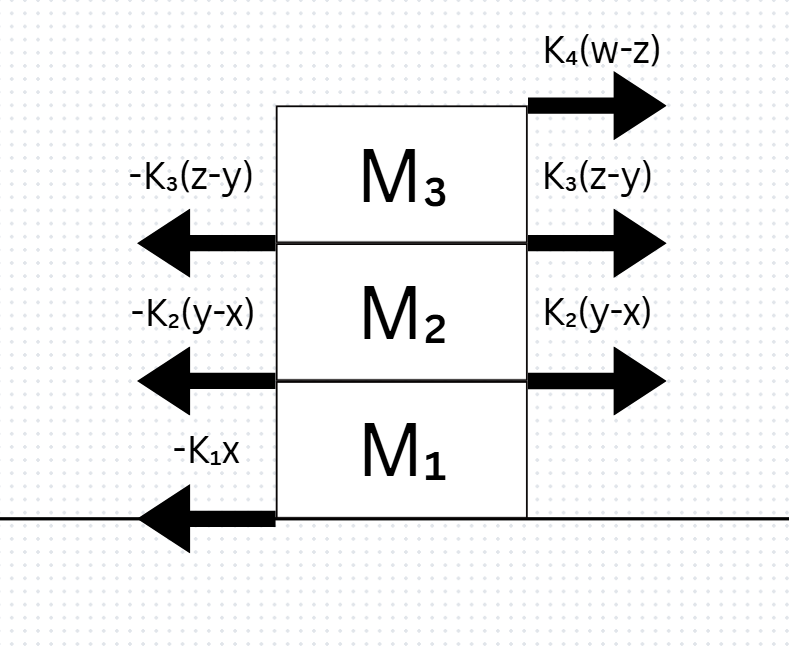

Essa imagem demonstra as forças atuando em um prédio de dois andares, considerando o térreo como a massa $m_1$, o primeiro andar como a massa $m_2$ e o segundo andar como a massa $m_3$. Usualmente, a estrutura de um edifício é formada por vigas e colunas que exercem a função de suportar as cargas produzidas por seus pavimentos.

Na maioria dos prédios, esta estrutura é construída em concreto armado, constituido por concreto e barras de aço, que é um material altamente elástico. Considerando essa característica estrutural, se supormos que os andares estejam conectados por junções elásticas cujos efeitos se assemelham ao de uma mola, podendo ser modeladas como molas com constantes elásticas k de acordo com a Lei de Hooke, e que todos os andares do edifício tenham massa constante, cada junção exercerá uma força restauradora $F$ quando os andares são deslocados um em relação ao outro, de modo que esta força é oposta à direção do deslocamento.

Aplicando novamente a Lei de Hooke, a força restauradora entre dois andares é dada por $F = k_i(x_i - x_{i-1})$, onde $k_i$ é a constante de proporcionalidade entre o $(i-1)$-ésimo e o $i$-ésimo pavimentos, $x_i$ o deslocamento horizontal do $i$-ésimo pavimento a partir do equilíbrio e $x_i - x_{i-1}$ o deslocamento do $i$-ésimo pavimento em relação ao $(i-1)$-ésimo pavimento.

Considerando que uma relação análoga aconteça entre piso e o térreo, podemos novamente aplicar a 2° Lei de Newton em cada seção do prédio $F = ma$, onde será novamente usado o fato que a aceleração é a segunda derivada do deslocamento. Com isso, podemos determinar a força resultante que está sendo aplicada em cada andar.

No térreo, atuam as forças restauradoras entre o piso e o térreo (nível $i=1$), levando em consideração o sentido negativo, e entre o térreo e o primeiro andar (nível $i=2$), considerando o sentido positivo: $F_1 = -k_1(x_1 - x_{1-1}) = -k_1x_1$ e $F_2 = k_2(x_2 - x_{2-1}) = k_2(x_2-x_1)$. Aplicando a segunda Lei de Newton $F = mx''$, temos que a equação da força resultante no andar térreo é dada por: $m_1x_1'' = -k_1x_1 + k_2(x_2-x_1)$.

O procedimento pode ser repetido para cada pavimento do prédio. Para um melhor uso de variáveis, decidimos usar letras diferentes ao invés de $x_i$ para a representação. No caso da imagem acima, $x_2$ é substituído por $y$, $x_3$ é substituído por $z$ e $x_4$ é substituído por $w$. A equação $k_4(w-z)$ foi desenhada para demonstrar uma continuidade na aplicação de forças restauradoras. No entando, ela não fará parte do sistema por não haver um andar acima do segundo.

Nós adicionaremos um componente $\sin(wt)$ na força do primeiro pavimento para mostrar uma força de natureza oscilatória. Com isso, temos que o sistema para um prédio de 2 andares é
$$
\begin{cases}
x'' = (-k_1x + k_2(y-x)+\sin(wt))/m_1 \\
y'' = (-k_2(y-x) + k_3(z-y))/m_2 \\
z'' = (-k_3(z-y))/m_3
\end{cases}
$$
que pode ser representado numericamente pela seguinte função:

In [ ]:
def sistema(f, t, m1, m2, m3, k1, k2, k3, w): #Equação que representa as forças atuando em um prédio de 2 andares sendo movimentado por um terremoto
  x1, x2, y1, y2, z1, z2 = f #Aqui x1 = x, x2 = x', y1 = y, y2 = y', z1 = z, z2 = z'
  dx1_dt = x2 #Fazendo dx1_dt = x'
  dy1_dt = y2 #Fazendo dy1_dt = y'
  dz1_dt = z2 #Fazendo dz1_dt = z'
  dx2_dt = (-k1 * x1 + k2 * (y1 - x1) + np.sin(w*t)) / m1 #Representando x"
  dy2_dt = (-k2 * (y1 - x1) + k3 * (z1 - y1)) / m2 #Representando y"
  dz2_dt = (-k3 * (z1 - y1)) / m3 #Representando z"
  return [dx1_dt, dx2_dt, dy1_dt, dy2_dt, dz1_dt, dz2_dt] #Retornando x', x", y', y", z', z"

Esse sistema representa as forças atuando em um prédio de 2 andares. O térreo é a massa $m_1$, o primeiro andar é a massa $m_2$ e o segundo andar é a massa $m_3$ com $x_1$, $y_1$, $z_1$ sendo seus respectivos deslocamentos. As rigidezes presentes no sistema são representadas por $k_1$, $k_2$ e $k_3$.

Com esse sistema, podemos analisar os efeitos que um prédio poderia sofrer sob um terremoto, sendo possível usá-lo para descobrirmos ótimos materiais para a construção de outros prédios ou analisar maneiras de criar um sistema de amortecimento para reduzir os efeitos.


# **(iv) Resultados e discussão**

### Calculando frequências fundamentais
Queremos observar o comportamento do prédio para diferentes frequências da força motriz, para observar o fenômeno de ressonância.

Para isto, é interessante obter as frequências naturais do sistema.

Dado um sistema
$$
  X'' = AX
$$
onde a matriz $A$ tem autovalores $\lambda_i$ negativos, as frequências naturais são as raízes quadradas dos autovalores: $w_i = \sqrt{- \lambda_i}$.

Podemos escrever nosso sistema, sem a força motriz, na forma matricial e calcular seus autovalores:
$$
  M X'' = K X
$$
onde
$$
  M = \begin{bmatrix}
    m_1 & 0 & 0 \\
    0 & m_2 & 0 \\
    0 & 0 & m_3
  \end{bmatrix} , \quad
  X = \begin{bmatrix}
    x(t) \\
    y(t) \\
    z(t)
  \end{bmatrix} \quad \text{e} \quad
  K = \begin{bmatrix}
     -k_1 - k_2 & k_2 & 0 \\
     k_2 & -k_2 -k_3 & k_3 \\
     0 & k_3 & -k_3
  \end{bmatrix} \\
  \implies  \begin{bmatrix}
    m_1 & 0 & 0 \\
    0 & m_2 & 0 \\
    0 & 0 & m_3
  \end{bmatrix} \cdot \frac{d^2}{dt^2} \begin{bmatrix}
    x(t) \\
    y(t) \\
    z(t)
  \end{bmatrix} = \begin{bmatrix}
     -k_1 - k_2 & k_2 & 0 \\
     k_2 & -k_2 -k_3 & k_3 \\
     0 & k_3 & -k_3
  \end{bmatrix} \cdot \begin{bmatrix}
    x(t) \\
    y(t) \\
    z(t)
  \end{bmatrix}
$$
Daí, isolamos o $X''$:
\begin{align}
  M X'' &= KX \\
  X'' &= M^{-1} K X
\end{align}
Portanto, queremos achar os autovalores da matriz
$$
  M^{-1}K = \begin{bmatrix}
     \dfrac{-k_1 - k_2}{m_1} & \dfrac{k_2}{m_1} & 0 \\
     \dfrac{k_2}{m_2} & \dfrac{-k_2 -k_3}{m_2} & \dfrac{k_3}{m_2} \\
     0 & \dfrac{k_3}{m_3} & \dfrac{-k_3}{m_3}
  \end{bmatrix}
$$
Podemos fazer isso numericamente.

In [ ]:
# Parametros
m1, m2, m3, k1, k2, k3 = 10000, 10000, 10000, 5000, 5000, 5000
# Matriz A = M^-1 * K
A = np.array([
  [(-k1-k2)/m1, k2/m1, 0],
  [k2/m2, (-k2-k3)/m2, k3/m2],
  [0, k3/m3, -k3/m3]
])

# Autovalores
eigv = np.linalg.eigvals(A)

# Frequencias naturais
freq = np.sqrt(-eigv)

print("Autovalores:", eigv)
print("Frequências:", freq)

Autovalores: [-1.6234898  -0.77747907 -0.09903113]
Frequências: [1.27416239 0.88174773 0.31469212]


Obtemos as frequências naturais
$$
\begin{cases}
  \omega_1 \approx 1.274 \\
  \omega_2 \approx 0.881 \\
  \omega_3 \approx 0.314
\end{cases}
$$


Agora podemos observar o comportamento do sistema quando é excitado com as frequências fundamentais.

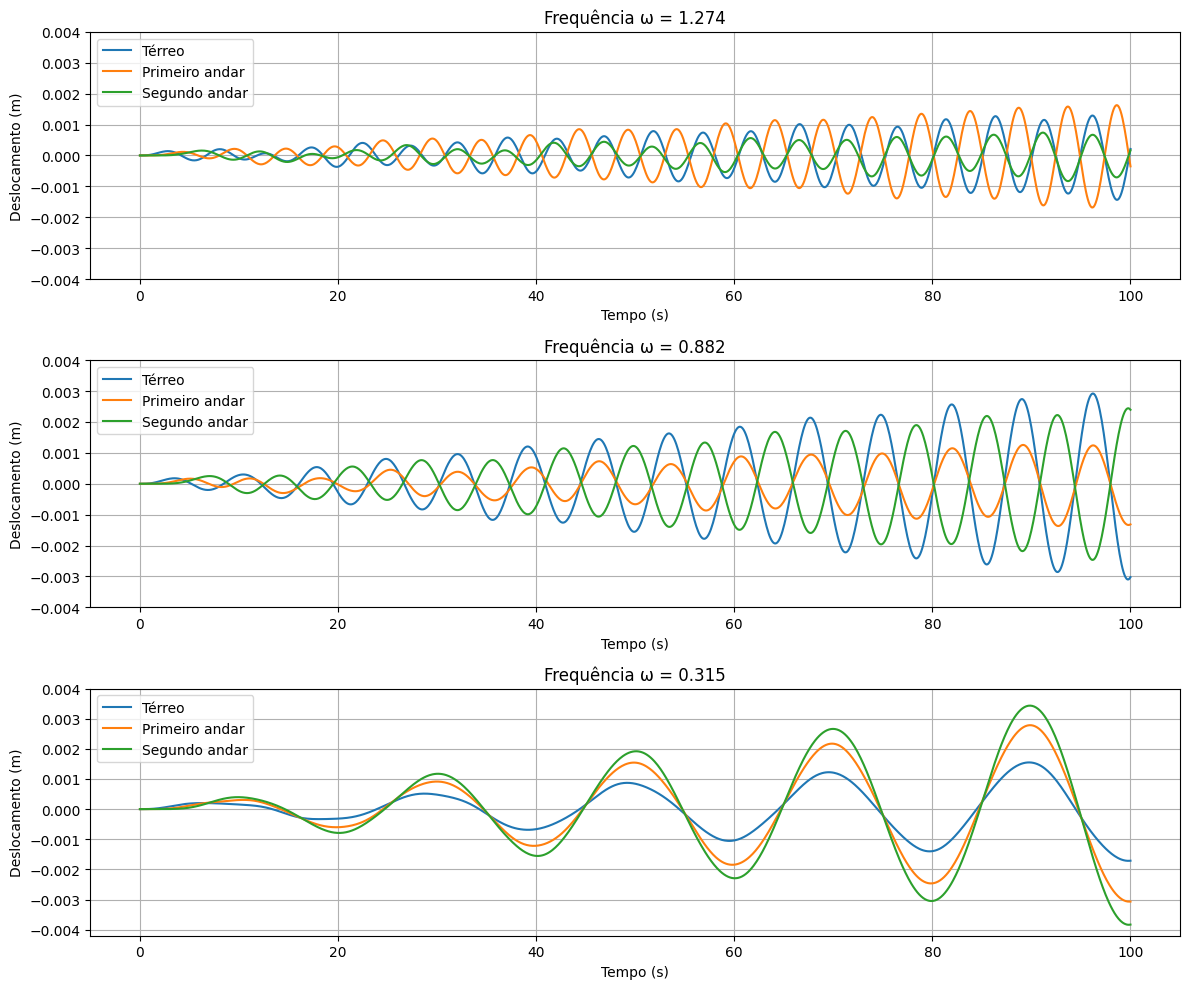

In [ ]:
cond_iniciais = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
t = np.linspace(0, 100, 1000)

# Plota as 3
fig, ax = plt.subplots(3, 1, figsize=(12, 10))
for i in range(3):
  w = freq[i]
  sol_predio = odeint(sistema, cond_iniciais, t, args = (m1, m2, m3, k1, k2, k3, w))
  ax[i].plot(t, sol_predio[:, 0], label='Térreo')
  ax[i].plot(t, sol_predio[:, 2], label='Primeiro andar')
  ax[i].plot(t, sol_predio[:, 4], label='Segundo andar')
  ax[i].set_xlabel('Tempo (s)')
  ax[i].set_ylabel('Deslocamento (m)')
  max_amp = max(max(np.abs(sol_predio[:, 0])), max(np.abs(sol_predio[:, 2])), max(np.abs(sol_predio[:, 4])))
  ax[i].set_title(f'Frequência ω = {w:.3f}')
  ax[i].legend()
  ax[i].grid()

# Deixa os tres com a mesma escala
for i in range(3):
  ax[i].set_yticks(ax[1].get_yticks())

plt.tight_layout()
plt.show()

Podemos também comparar o comportamento do sistema em ressonância com seu comportamento sem ressonância.

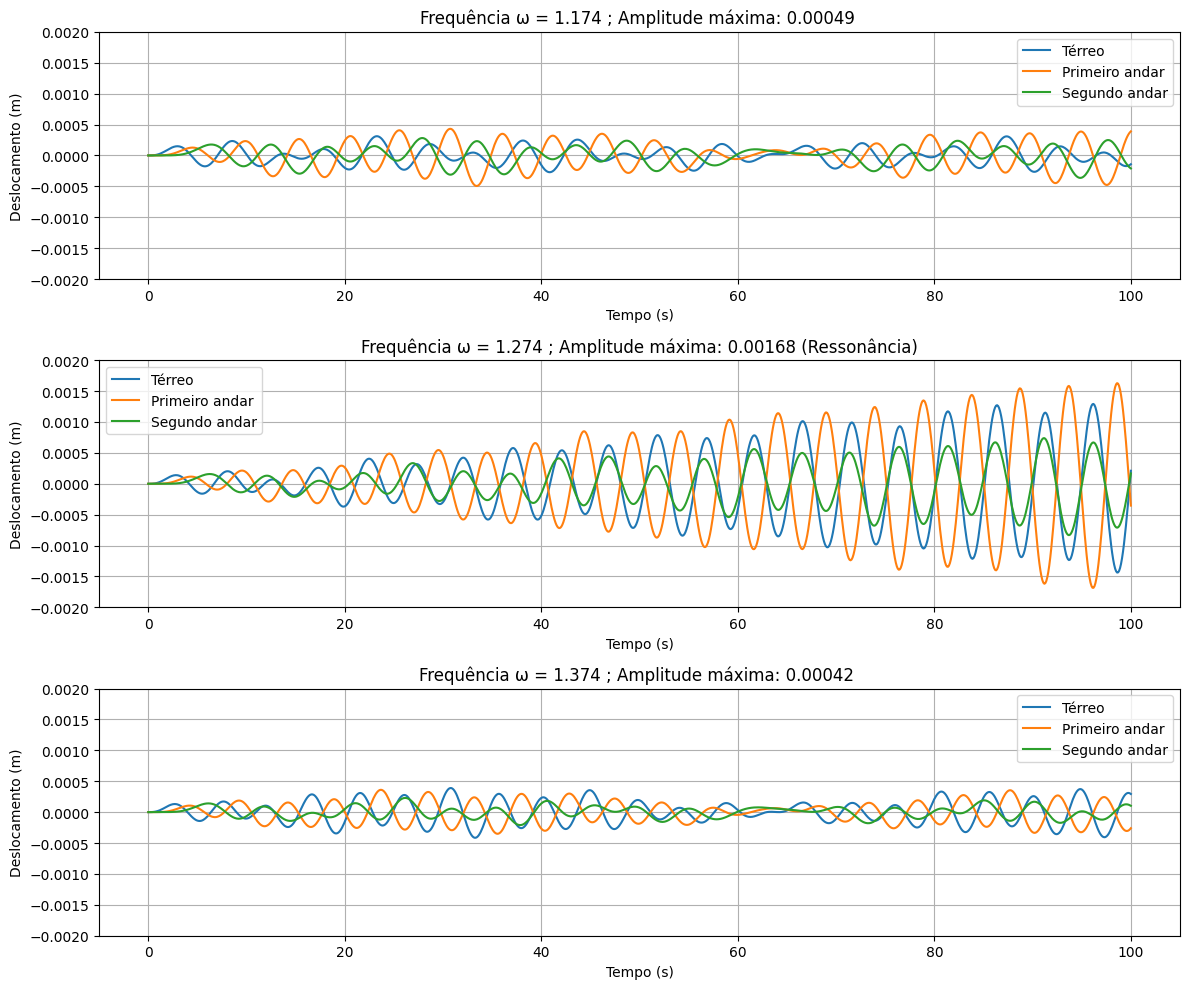

In [ ]:
cond_iniciais = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
t = np.linspace(0, 100, 1000)

# Plota as 3
fig, ax = plt.subplots(3, 1, figsize=(12, 10))
idx=0
ws = [freq[idx]-0.1, freq[idx], freq[idx]+0.1]
for i in range(3):
  w = ws[i]
  sol_predio = odeint(sistema, cond_iniciais, t, args = (m1, m2, m3, k1, k2, k3, w))
  ax[i].plot(t, sol_predio[:, 0], label='Térreo')
  ax[i].plot(t, sol_predio[:, 2], label='Primeiro andar')
  ax[i].plot(t, sol_predio[:, 4], label='Segundo andar')
  ax[i].set_xlabel('Tempo (s)')
  ax[i].set_ylabel('Deslocamento (m)')
  max_amp = max(max(np.abs(sol_predio[:, 0])), max(np.abs(sol_predio[:, 2])), max(np.abs(sol_predio[:, 4])))
  ax[i].set_title(f'Frequência ω = {w:.3f} ; Amplitude máxima: {max_amp:.5f} {"(Ressonância)" if i==1 else ""}')
  ax[i].legend()
  ax[i].grid()

# Deixa os tres com a mesma escala
for i in range(3):
  ax[i].set_yticks(ax[1].get_yticks())

plt.tight_layout()
plt.show()

Podemos observar que, na primeira e última soluções, a amplitude da oscilação também oscila, ou seja, a amplitude começa crescendo e depois decresce. Já na segundo solução, na medida que o tempo passa, a amplitude da oscilação apenas aumenta, ou seja, o sistema vai ganhando mais energia. Isso acontece porque, como a força externa está oscilando a uma frequência natural do sistema, acontece o fenômeno de ressonância.

Em prédios, oscilações com amplitudes altas podem causar danos estruturais. Por isso, se um terremoto vibrar o solo à mesma frequência de uma das frequências naturais, da estrutura, as oscilações podem ter consequências desastrosas. Calculando o período de oscilação referente a cada frequência natural, temos:
$$
T = \frac{2 \pi}{\omega}
\implies \begin{cases}
  T_1 = \frac{2 \pi}{\omega_1} \approx 4.931 \\
  T_2 = \frac{2 \pi}{\omega_2} \approx 7.125 \\
  T_3 = \frac{2 \pi}{\omega_3} \approx 19.966 \\
\end{cases}
$$

Sabendo que o período de oscilação de um terremoto típico costuma estar entre 2 a 3 segundos [1], podemos notar que a estrutura simulada não corre grande risco de danos estruturais devido à ressonância. Podemos usar uma estratégia para diminuir o deslocamento dos prédios, sendo ela a redução de massa nos andares superiores para mitigar os riscos sísmicos.

Durante um terremoto, cada andar do edifício experimenta uma aceleração imposta pela base. Segundo a segunda lei de Newton $F = ma$, a força inercial gerada em cada andar é diretamente proporcional à sua massa. Quanto maior a massa de um andar, maior será a força inercial durante o terremoto, o que exige maior rigidez e resistência da estrutura para evitar falhas. Logo, uma possível solução seria reduzir as massas dos andares superiores para diminuir as forças transmitidas para os elementos inferiores e reduz o deslocamento total da estrutura.

Agora vamos apresentar uma simulação de um prédio com as mesmas constantes elásticas k, porém colocando as massas dos prédio reduzindo gradualmente de 3000 em 3000:

In [ ]:
# Novos parametros
m1, m2, m3, k1, k2, k3 = 10000, 7000, 4000, 5000, 5000, 5000
# Matriz A = M^-1 * K
A = np.array([
  [(-k1-k2)/m1, k2/m1, 0],
  [k2/m2, (-k2-k3)/m2, k3/m2],
  [0, k3/m3, -k3/m3]
])

# Autovalores
eigv = np.linalg.eigvals(A)

# Frequencias naturais
freq = np.sqrt(-eigv)

print("Autovalores:", eigv)
print("Frequências:", freq)

Autovalores: [-2.43274537 -1.07514362 -0.17068244]
Frequências: [1.55972606 1.03689132 0.41313732]


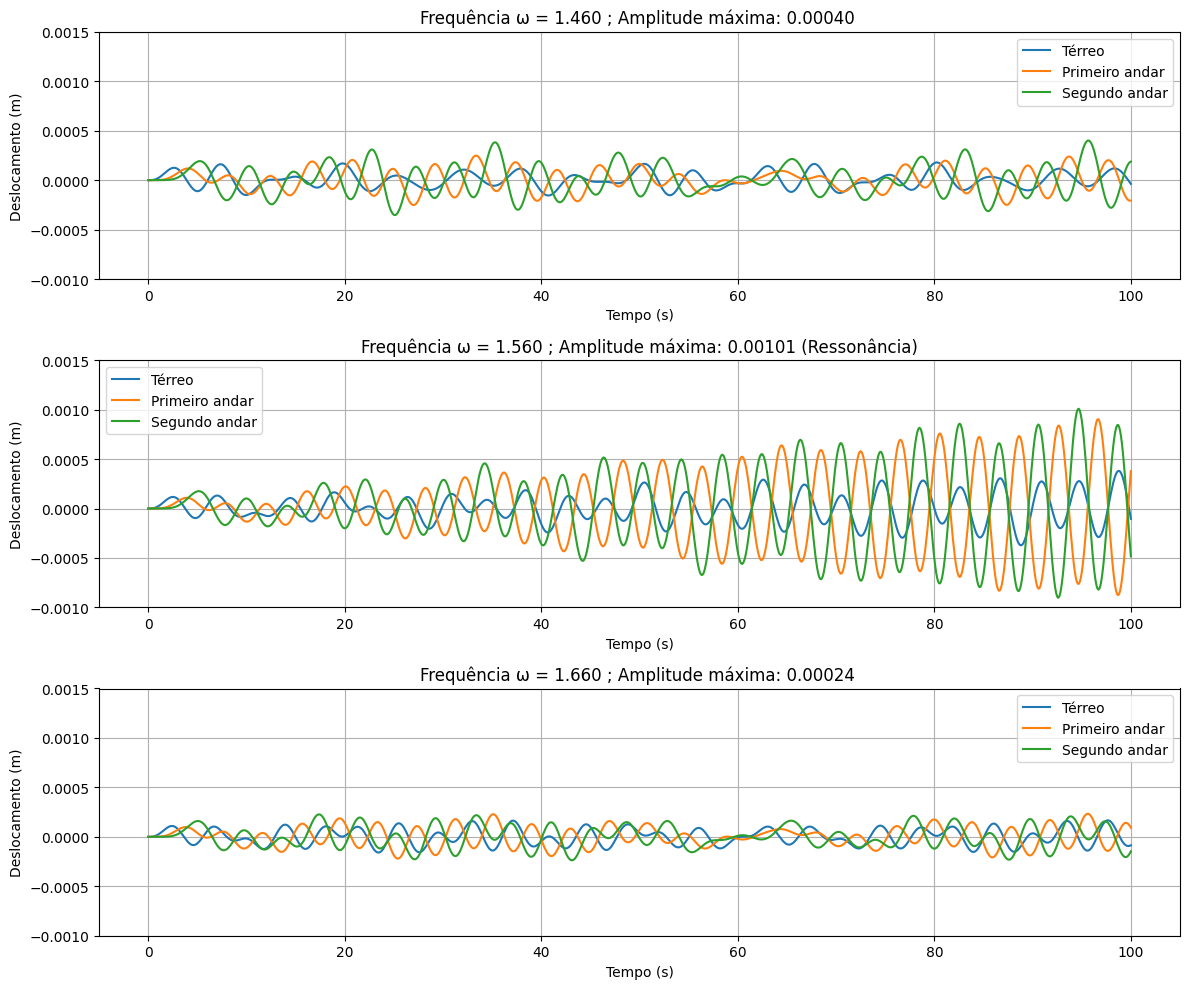

In [ ]:
cond_iniciais = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
t = np.linspace(0, 100, 1000)

# Plota as 3
fig, ax = plt.subplots(3, 1, figsize=(12, 10))
idx=0
ws = [freq[idx]-0.1, freq[idx], freq[idx]+0.1]
for i in range(3):
  w = ws[i]
  sol_predio = odeint(sistema, cond_iniciais, t, args = (m1, m2, m3, k1, k2, k3, w))
  ax[i].plot(t, sol_predio[:, 0], label='Térreo')
  ax[i].plot(t, sol_predio[:, 2], label='Primeiro andar')
  ax[i].plot(t, sol_predio[:, 4], label='Segundo andar')
  ax[i].set_xlabel('Tempo (s)')
  ax[i].set_ylabel('Deslocamento (m)')
  max_amp = max(max(np.abs(sol_predio[:, 0])), max(np.abs(sol_predio[:, 2])), max(np.abs(sol_predio[:, 4])))
  ax[i].set_title(f'Frequência ω = {w:.3f} ; Amplitude máxima: {max_amp:.5f} {"(Ressonância)" if i==1 else ""}')
  ax[i].legend()
  ax[i].grid()

# Deixa os tres com a mesma escala
for i in range(3):
  ax[i].set_yticks(ax[1].get_yticks())

plt.tight_layout()
plt.show()

Como podemos observar, a amplitude máxima dos deslocamentos dos prédios estão menores em relação à simulação com os prédios de mesma massa para os andares.

# **(v) Conclusão**

O presente projeto demonstrou a eficácia de um modelo matemático simplificado na análise do comportamento sísmico de edifícios de múltiplos andares. Por meio da resolução de um sistema de equações diferenciais e da aplicação da teoria de autovalores e autovetores, foram determinadas as frequências naturais de oscilação da estrutura e os seus respectivos períodos de oscilação (aproximadamente 4,931 s, 7,125 s e 19,996 s). Observou-se que esses períodos são significativamente distintos do período de oscilação de um terremoto típico (2s a 3s), indicando uma baixa probabilidade de danos estruturais severos por ressonância no cenário modelado. Apesar das simplificações inerentes ao modelo, como a ausência de amortecimento e a idealização das propriedades elásticas, sua eficácia foi comprovada na análise de amplitudes de oscilação e riscos de colapso para os propósitos deste estudo. Sugere-se como trabalhos futuros a inclusão de fatores de amortecimento e a expansão do modelo para contemplar um maior número de graus de liberdade, visando uma representação mais abrangente e realista da dinâmica estrutural.

# **(vi) Referências**

[1] Barbosa, A. A. *Efeitos de um terremoto em um prédio de vários andares: uma
modelagem matemática sobre sistemas de equações diferenciais*. 2019. Trabalho de Conclusão de Curso (Graduação em Matemática) – Universidade Federal da Paraíba, João Pessoa, 13 dez. 2019. Disponível em: https://repositorio.ufpb.br/jspui/handle/123456789/16872. Acesso em: 10 ago. 2025. (Disponível também em PDF na entrega do projeto).

[2] Varanis, M.; Silva, A. L.; Mereles, A. G. *On mechanical vibration analysis of a multi degree of freedom system based on arduino and MEMS accelerometers*. Revista Brasileira de Ensino de Física, v. 40, n. 1, 2018. DOI: 10.1590/1806-9126-RBEF-2017-0101. Disponível em: https://doi.org/10.1590/1806-9126-RBEF-2017-0101. Acesso em: 11 ago. 2025